In [19]:
!nvidia-smi

Thu Apr 18 10:00:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [20]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/.shortcut-targets-by-id/1pVc8ZIK-0WG1Jmt-WwAzAArXCZl-rtd7/website_element_detection_Yolo_v8


Install Libraries


In [21]:
!pip install ultralytics==8.0.20
from IPython import display

display.clear_output()
import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/78.2 GB disk)


In [22]:
from ultralytics import YOLO

from IPython.display import display, Image


**Custom Training**

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
%cd /content/drive/MyDrive/website_element_detection_Yolo_v8

/content/drive/.shortcut-targets-by-id/1pVc8ZIK-0WG1Jmt-WwAzAArXCZl-rtd7/website_element_detection_Yolo_v8


In [25]:
!ls

Data_image  data.yaml  Image_test  Main_website_element_detection.ipynb


In [26]:
%cd /content/drive/MyDrive/website_element_detection_Yolo_v8

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=640 plots=True

/content/drive/.shortcut-targets-by-id/1pVc8ZIK-0WG1Jmt-WwAzAArXCZl-rtd7/website_element_detection_Yolo_v8
100% 21.5M/21.5M [00:00<00:00, 139MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=N

In [27]:
!ls runs/detect/train/

args.yaml					    results.csv		train_batch2.jpg
confusion_matrix.png				    results.png		val_batch0_labels.jpg
events.out.tfevents.1713434433.e416243fc110.8910.0  train_batch0.jpg	val_batch0_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch1_labels.jpg
P_curve.png					    train_batch225.jpg	val_batch1_pred.jpg
PR_curve.png					    train_batch226.jpg	weights
R_curve.png					    train_batch227.jpg


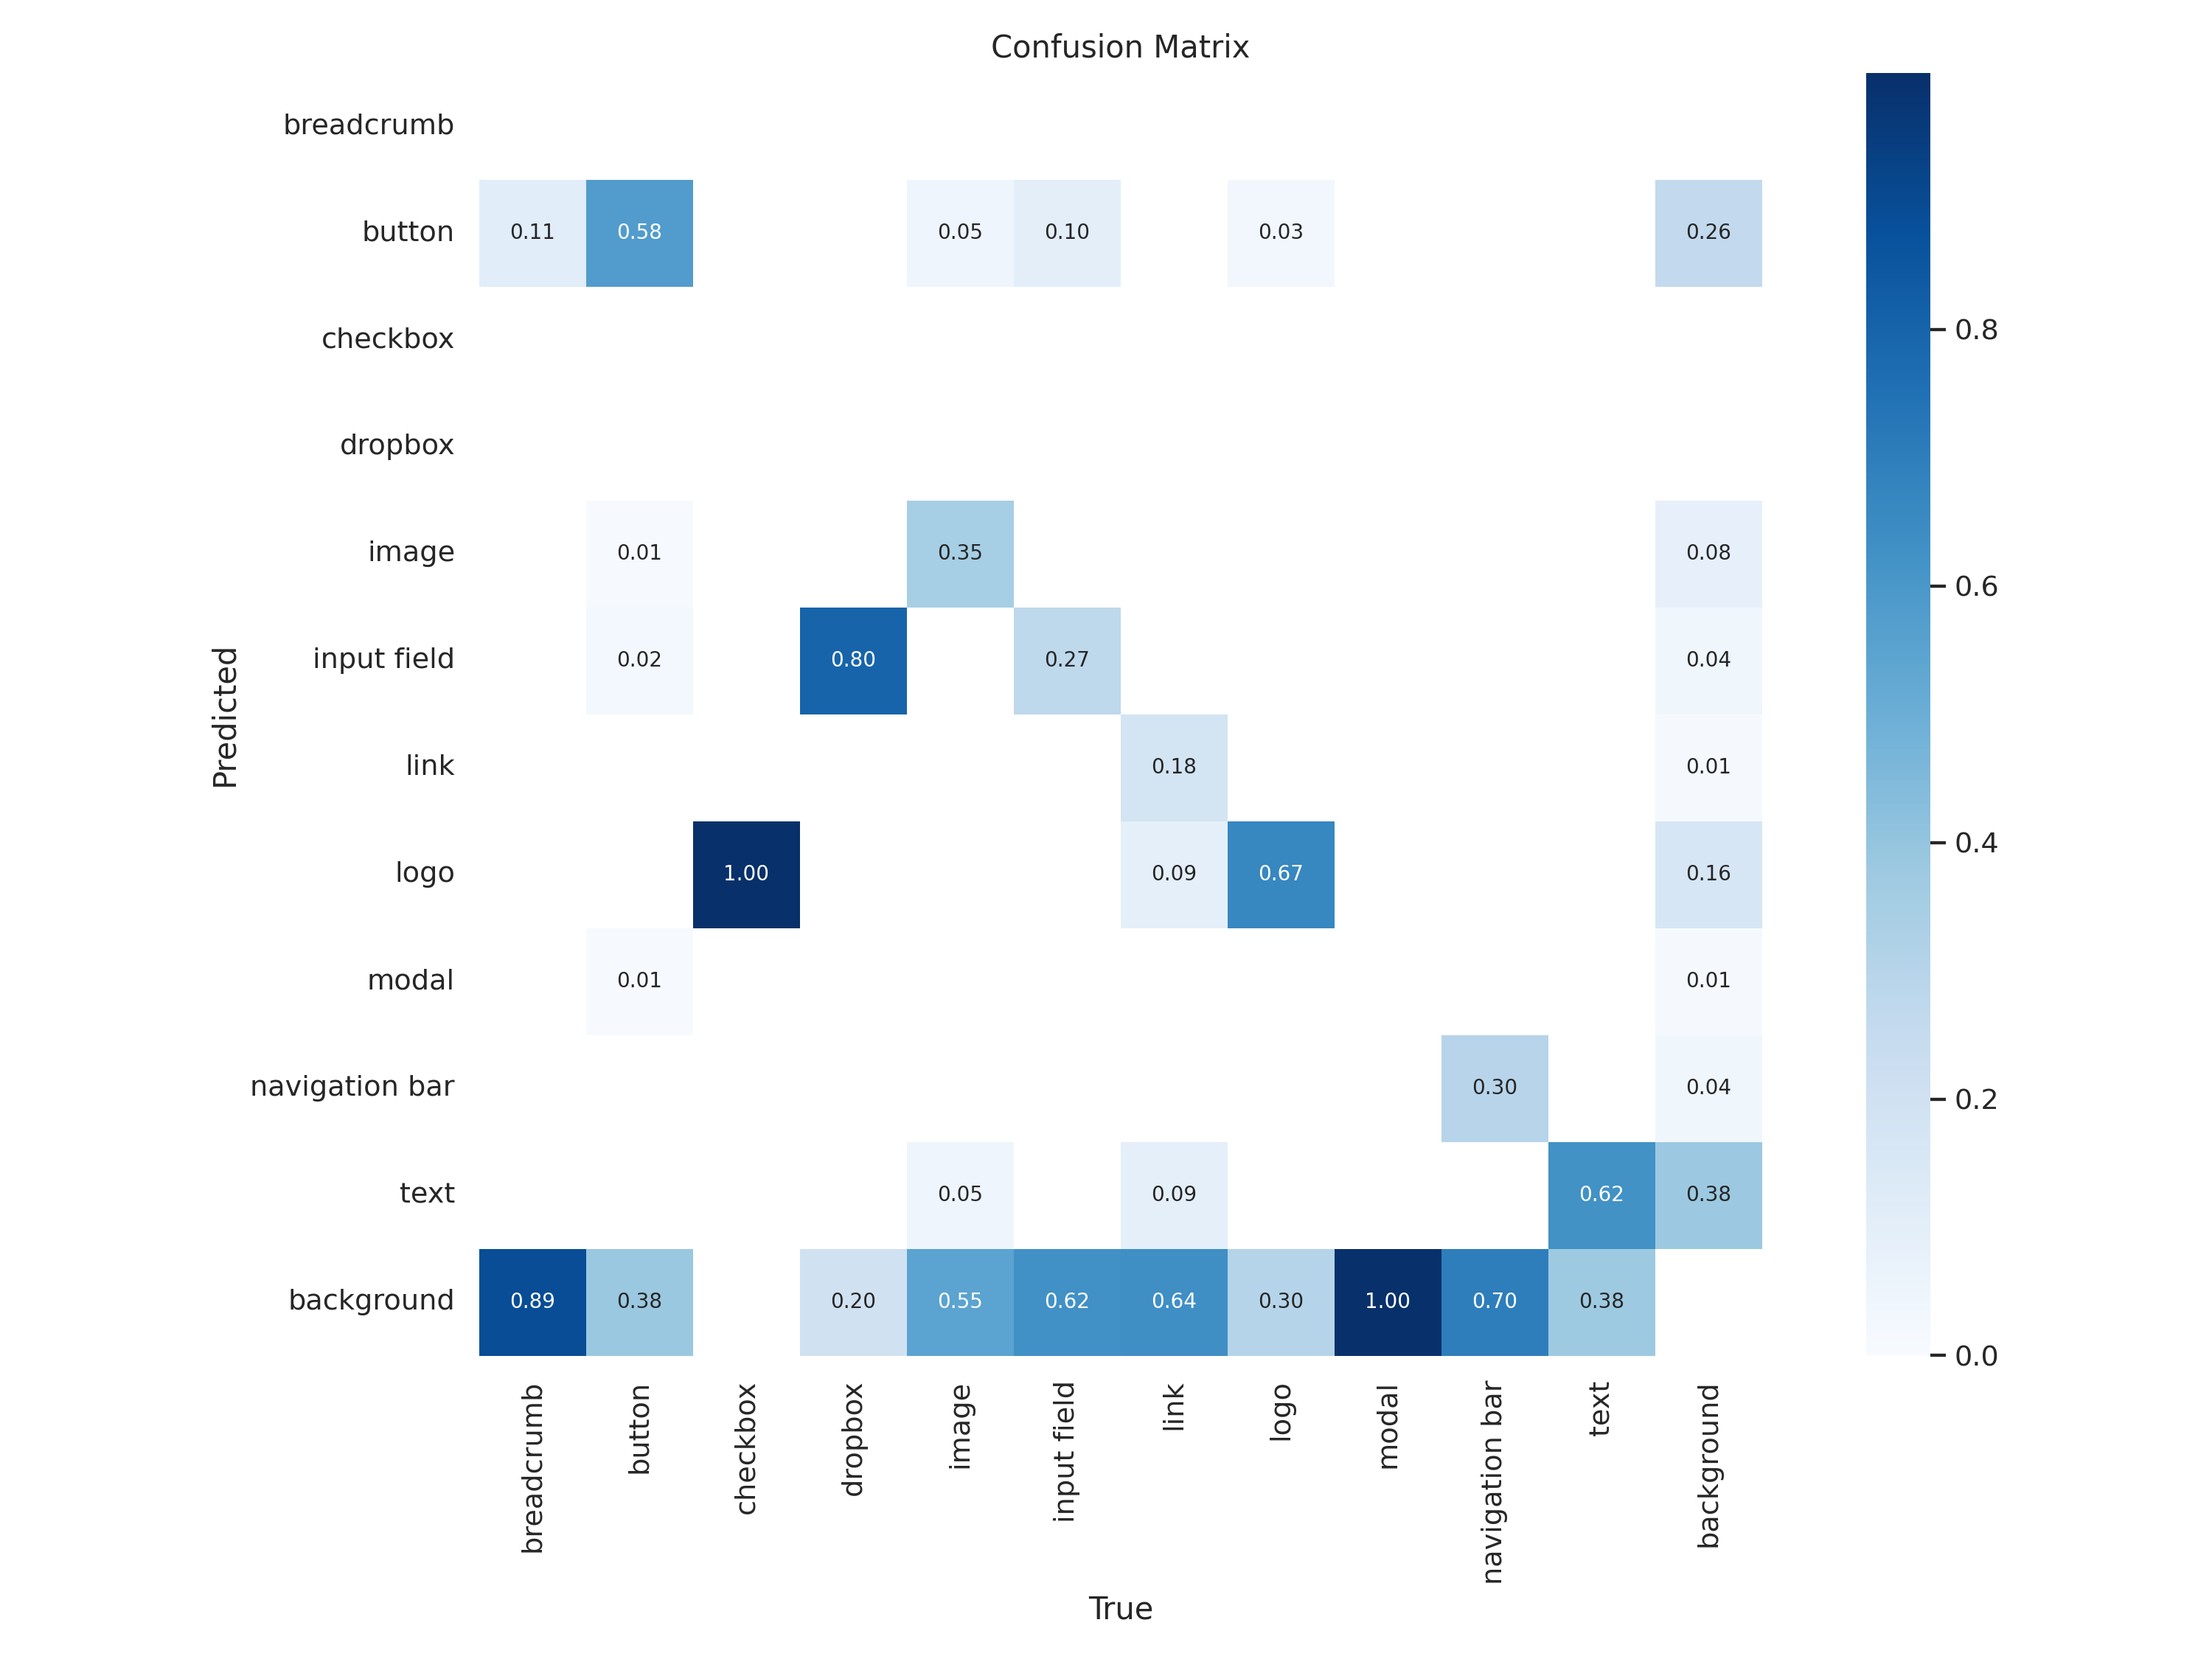

In [29]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

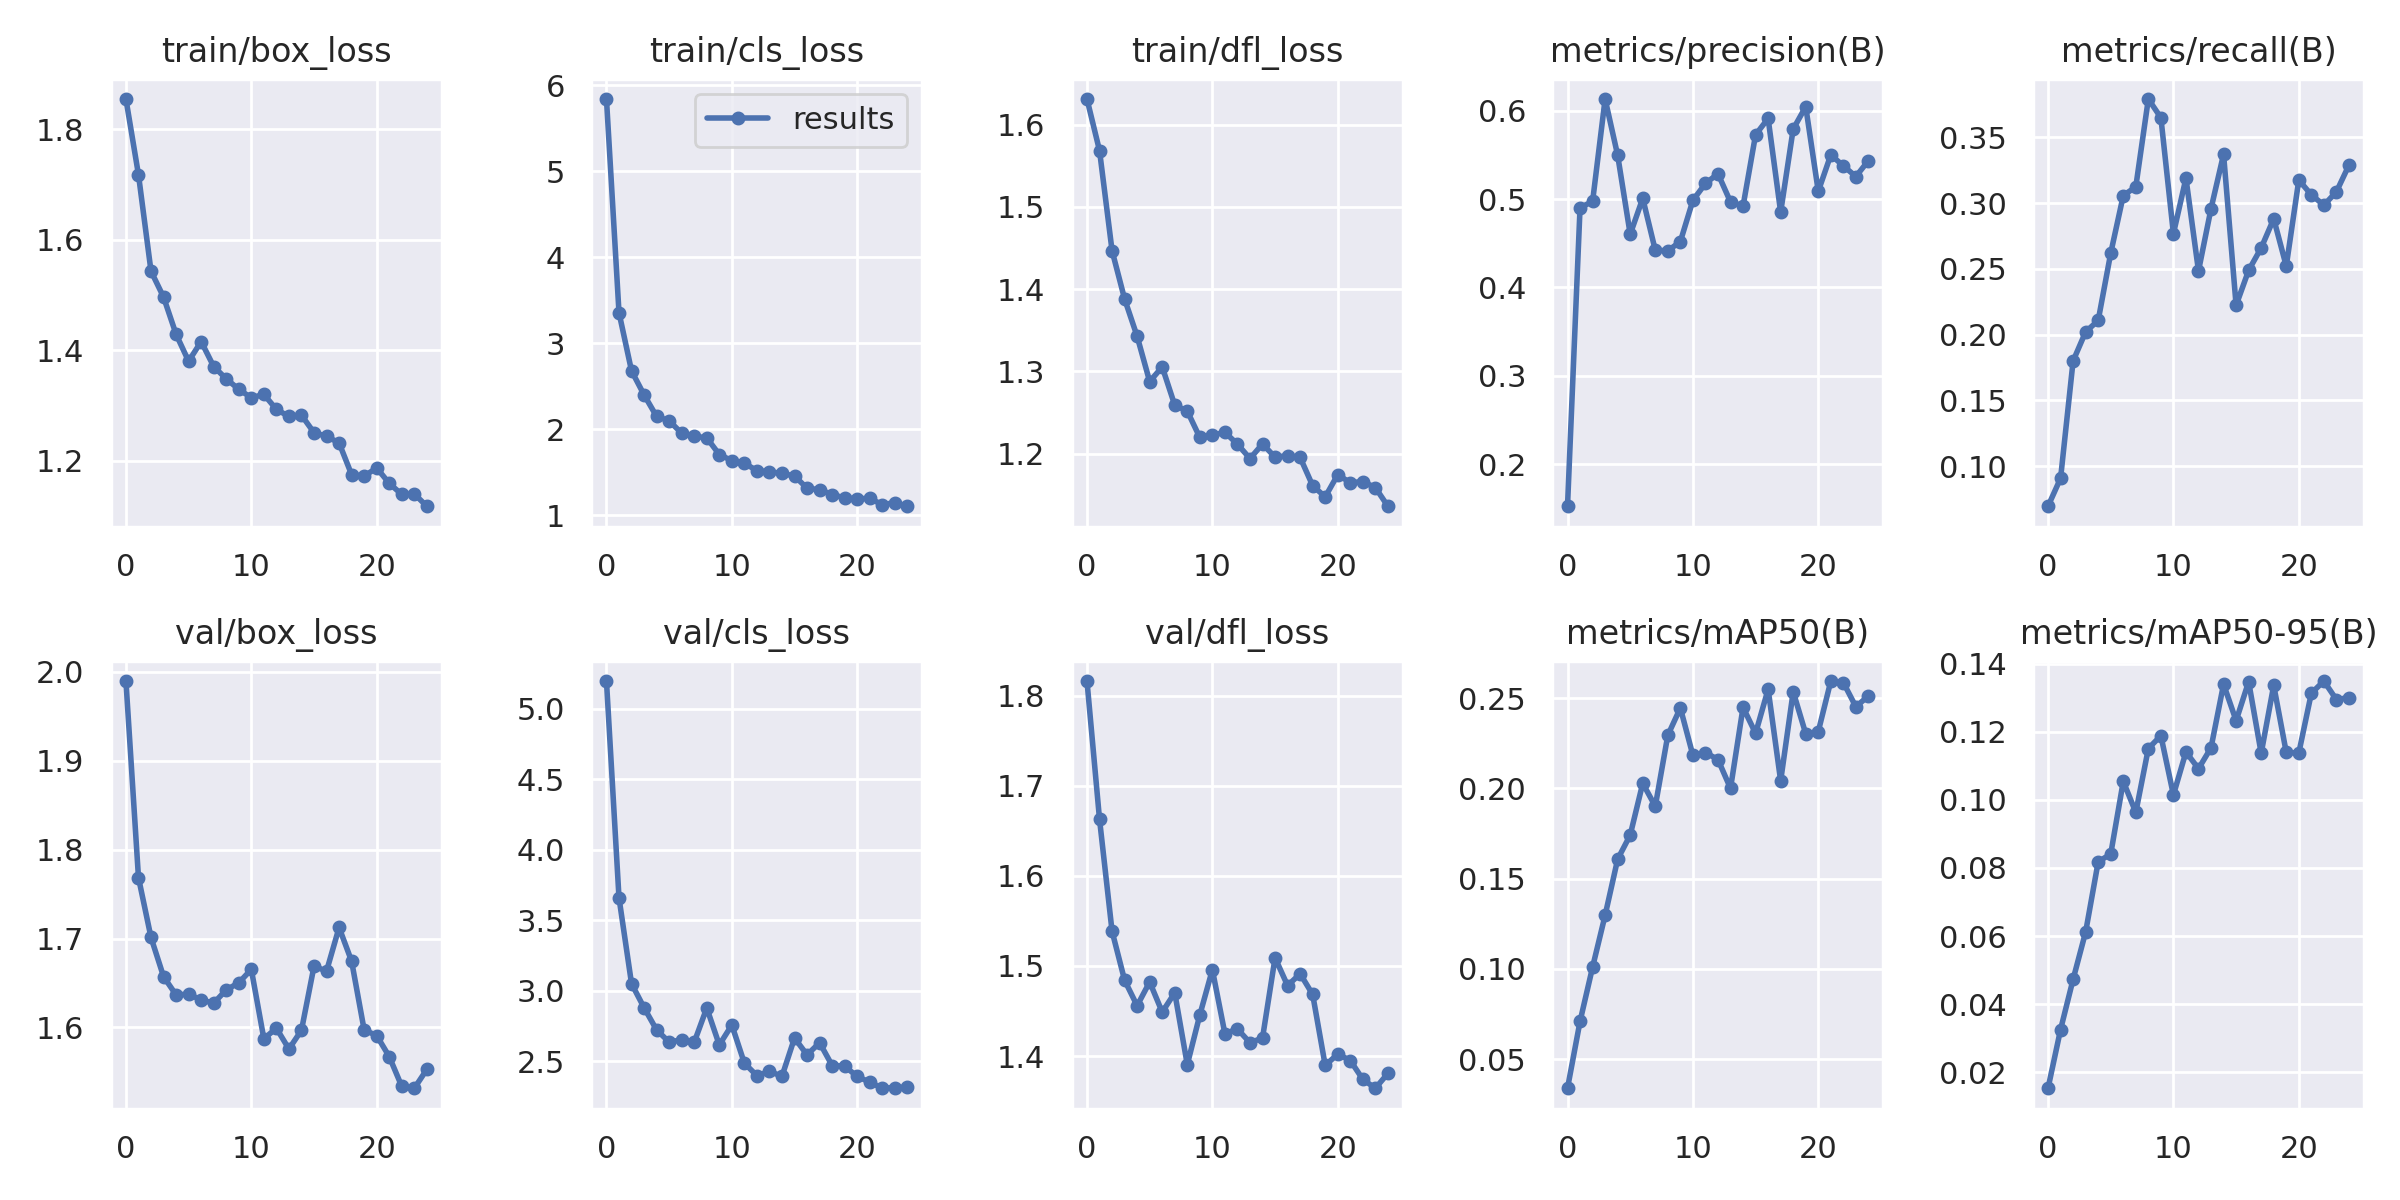

In [30]:
Image(filename='runs/detect/train/results.png', width=600)

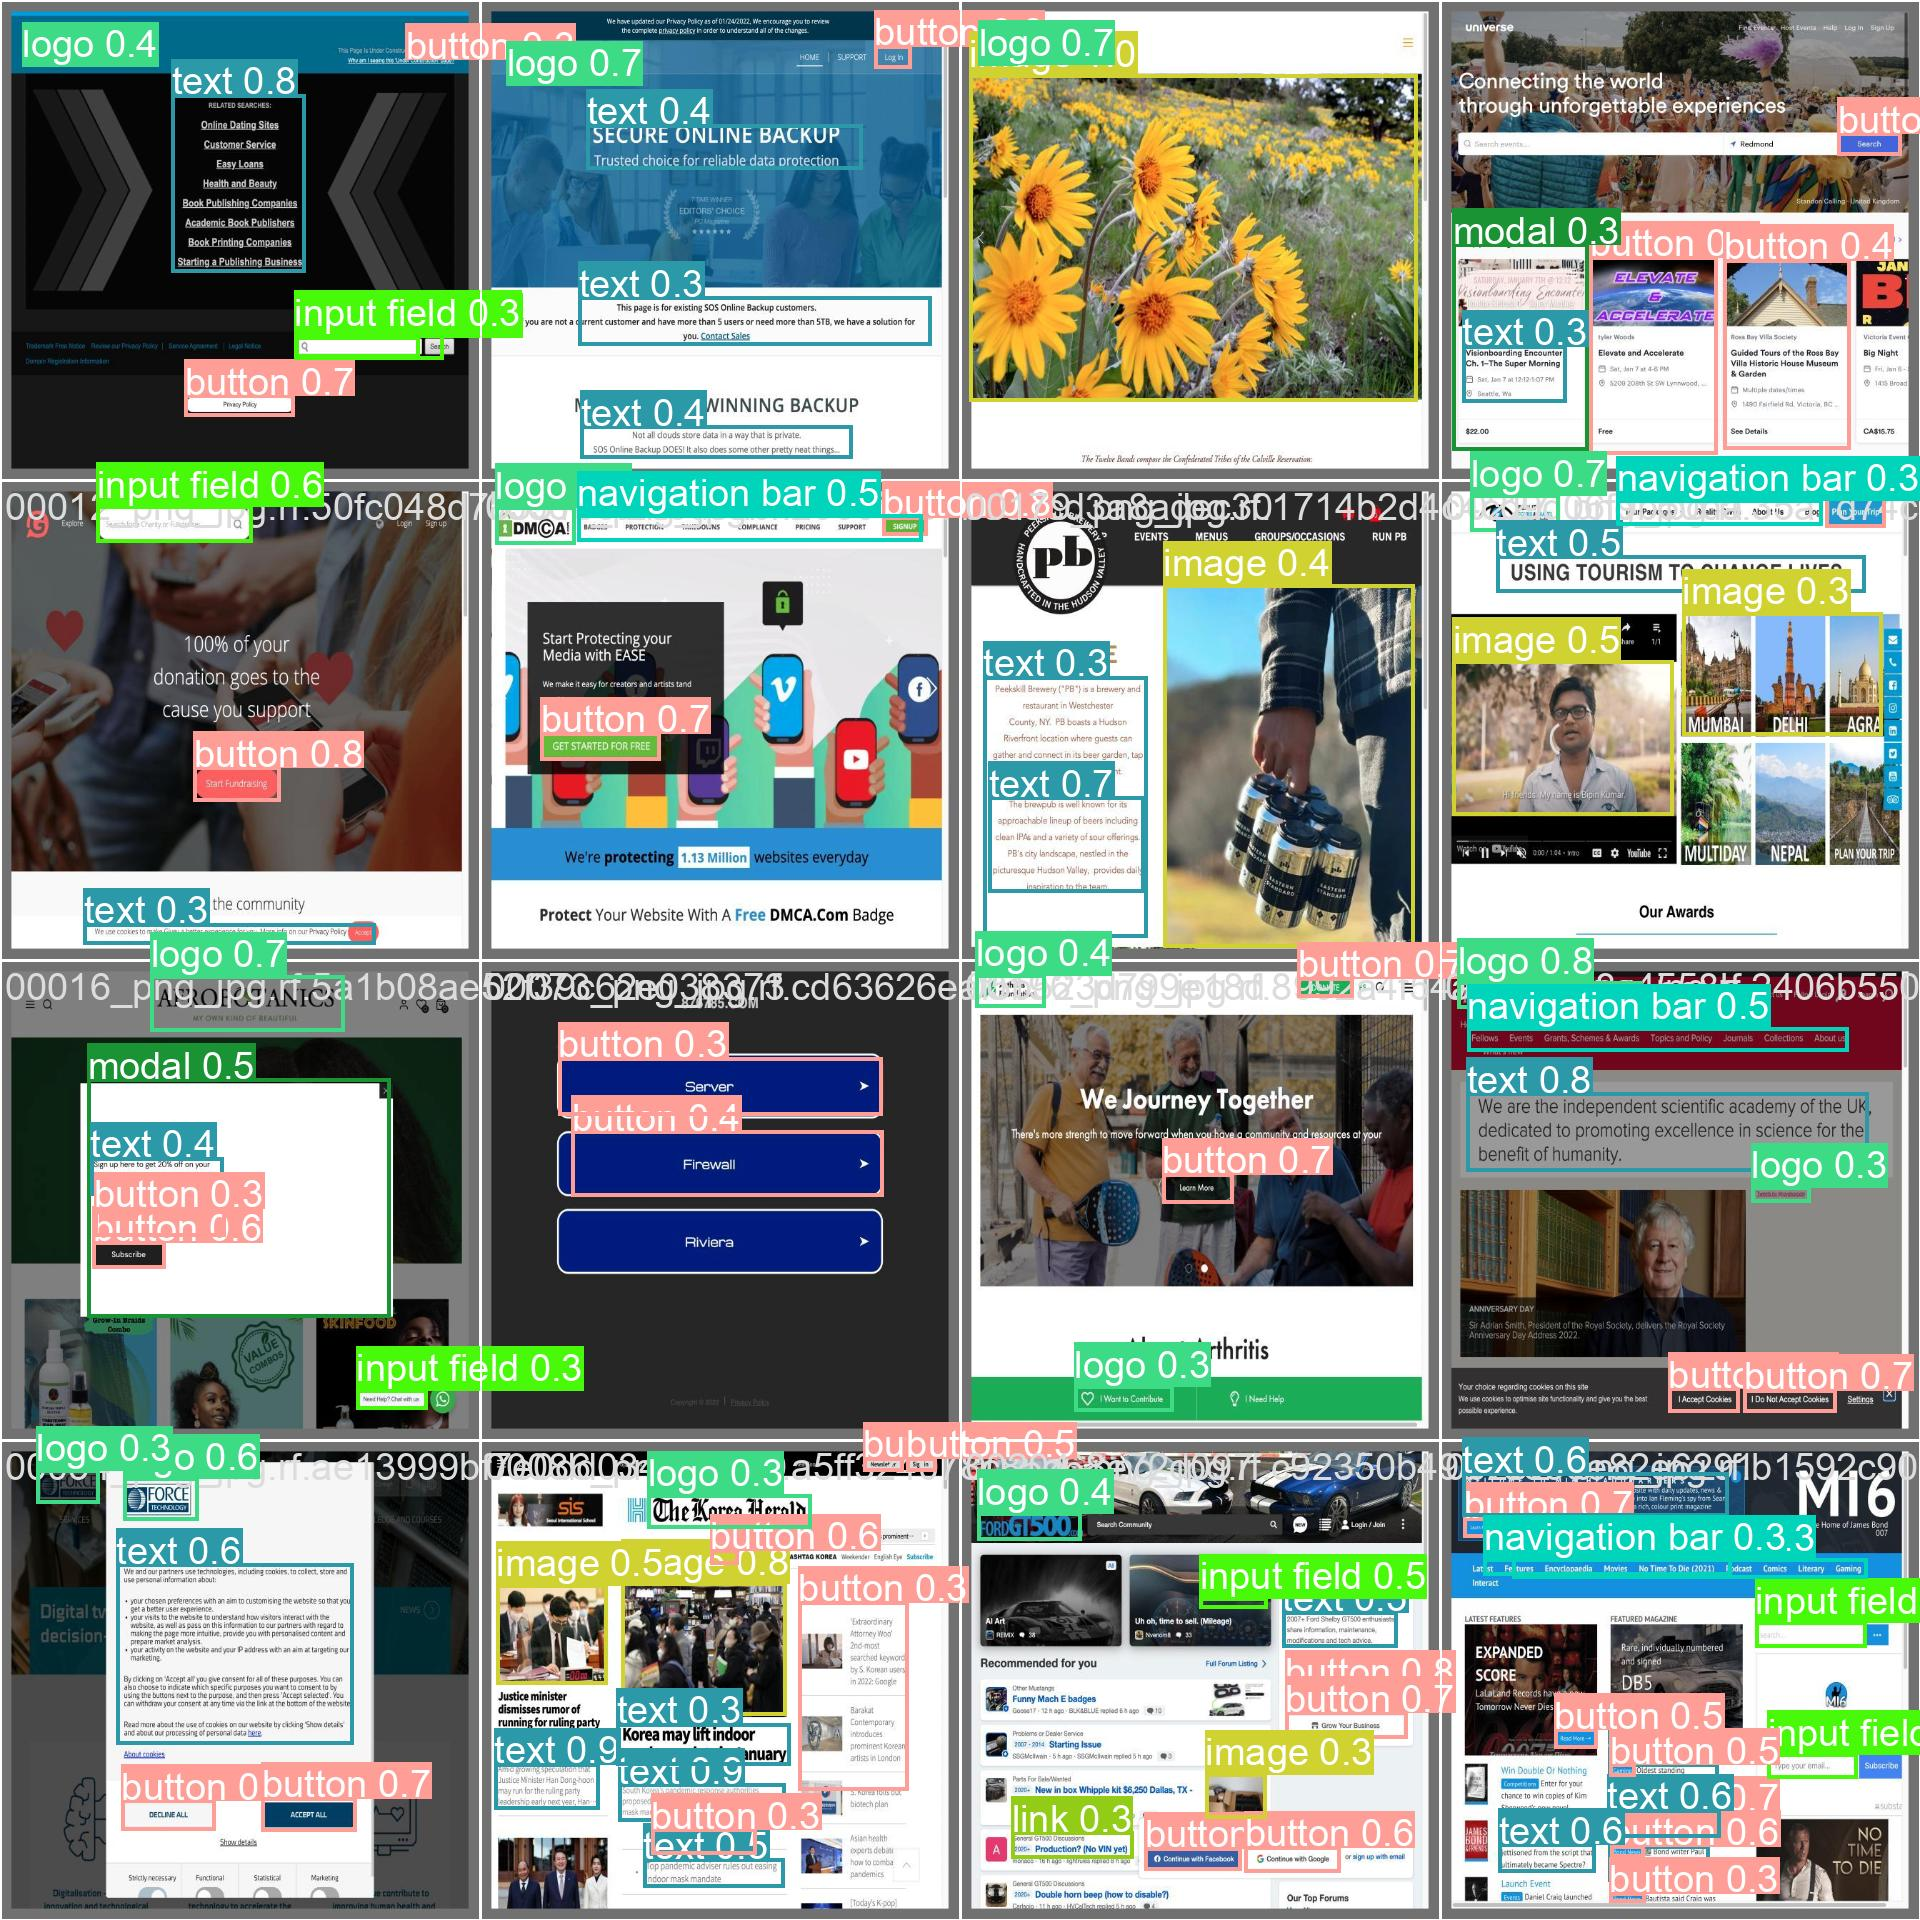

In [31]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

**Validate Custom Model**

In [36]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml


2024-04-18 10:13:19.290079: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-18 10:13:19.290136: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-18 10:13:19.291575: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-18 10:13:20.422138: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129841 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/drive/.shortcut-targets-by-id/1pVc8ZIK-0WG1Jmt-WwA


**Inference with Custom Model**

In [35]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/website_element_detection_Yolo_v8/Data_image/test/images

2024-04-18 10:13:06.144948: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-18 10:13:06.145000: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-18 10:13:06.146450: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-18 10:13:07.350224: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129841 parameters, 0 gradients, 28.5 GFLOPs
image 1/23 /content/drive/.shortcut-targets-by-id/1pVc8ZIK-0WG1Jmt-WwAzAA

In [37]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/website_element_detection_Yolo_v8/Image_test/train/images/Sign-In-Page_png.rf.319451409820032945b27c656ab2e9bc.jpg

2024-04-18 10:13:41.672938: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-18 10:13:41.672996: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-18 10:13:41.674892: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-18 10:13:43.332735: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129841 parameters, 0 gradients, 28.5 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/.short